In [14]:
import sympy as sp
import numpy as np

In [15]:
def init(x,N):

  if N < 1 : N = 1
  result = np.zeros((len(x), N+1))

  for i in range(len(x)):

    result[i][0] = 1
    result[i][1] = x[i]

  return result

In [16]:
def cheby(x,N):

  result = init(x,N)

  if N > 1:

    for i in range(len(x)):

      for j in range(2,N+1):

        result[i][j] = 2*x[i]*result[i][j-1] - result[i][j-2]

  elif N == 0: return result[:,0]
  elif N == 1: return [result[:,[0,1]]]

  return result


In [28]:
x = np.arange(-1,1,0.001)
N = 4

print( cheby(x,4) )

[[ 1.         -1.          1.         -1.          1.        ]
 [ 1.         -0.999       0.996002   -0.991012    0.98403997]
 [ 1.         -0.998       0.992008   -0.98204797  0.96815974]
 ...
 [ 1.          0.997       0.988018    0.97310789  0.95235914]
 [ 1.          0.998       0.992008    0.98204797  0.96815974]
 [ 1.          0.999       0.996002    0.991012    0.98403997]]


### Sympy plot (can ignore this)

In [ ]:
plot_N = 4
y = sp.symbols('y')
T = [1,y]

for i in range(2,plot_N+1):

  T.append( sp.simplify(2*y*T[i-1]-T[i-2]) )

print(T)


[1, y, 2*y**2 - 1, y*(4*y**2 - 3), 8*y**4 - 8*y**2 + 1]


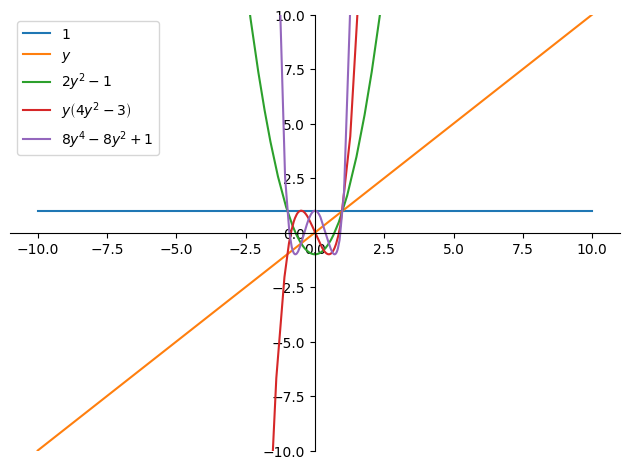

In [ ]:
from sympy.plotting import plot

plot(T[0],T[1],T[2],T[3],T[4], ylim=(-10,10) ,legend=True, xlabel=False, ylabel=False)

### Self Plot 🤨

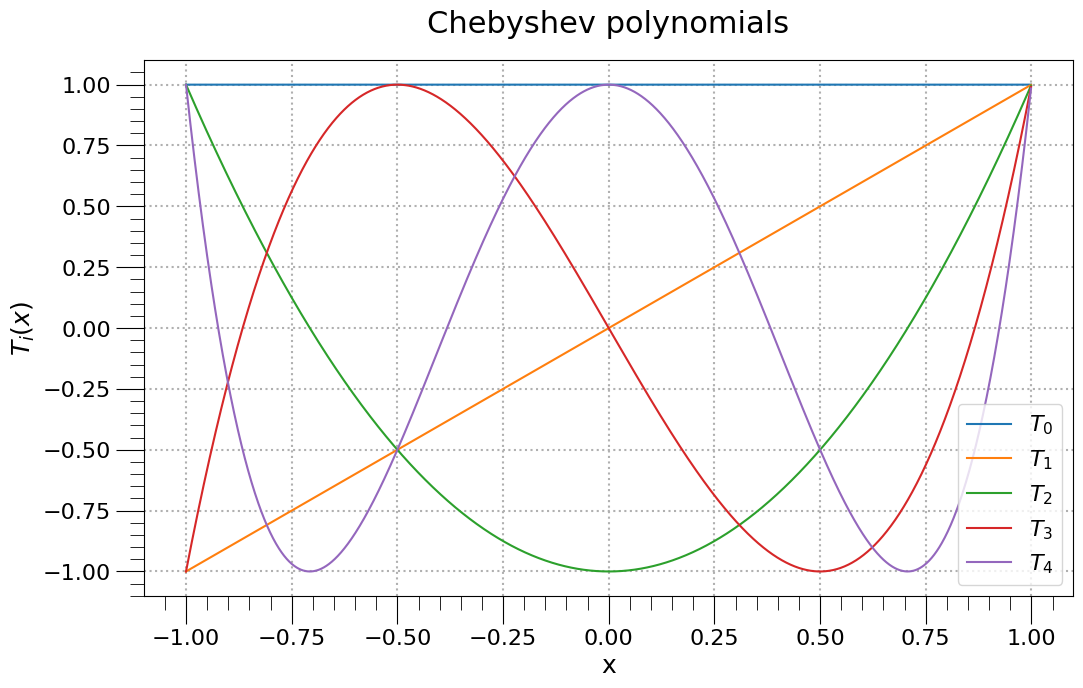

In [29]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize = (11,7))
ax = fig.add_subplot(1,1,1)

result_4 = cheby(x,4)

plt.plot(x, result_4[:,0], label="$T_0$")
plt.plot(x, result_4[:,1], label="$T_1$")
plt.plot(x, result_4[:,2], label="$T_2$")
plt.plot(x, result_4[:,3], label="$T_3$")
plt.plot(x, result_4[:,4], label="$T_4$")

plt.title("Chebyshev polynomials", fontsize = 22, pad = 20)
plt.xlabel("x", fontsize = 18)
plt.ylabel(r"$T_i(x)$", loc = "center", fontsize = 18)
plt.legend(fontsize = 16)
plt.grid(linestyle = "dotted", linewidth = 1.5)

plt.subplots_adjust(top=0.89,
bottom=0.125,
left=0.13,
right=0.975,
hspace=0.2,
wspace=0.2)
plt.minorticks_on()
plt.tick_params(length=20, axis='both', labelsize=16, which='major')
plt.tick_params(length=10,  axis='both', which='minor')

plt.show()